In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from urllib.parse import urlparse

In [2]:
before_covid_top_videos_df = pd.read_json('transcripts_summarized_BEFORE_COVID.json')
after_covid_top_videos_df = pd.read_json('transcripts_summarized_AFTER_COVID.json')

In [3]:
# Group by CHANNEL_IDEOLOGY to get the number of videos per ideology
before_covid_videos_per_ideology = before_covid_top_videos_df.groupby('channel.ideology').size().reset_index(name='VIDEO_COUNT')
after_covid_videos_per_ideology = after_covid_top_videos_df.groupby('channel.ideology').size().reset_index(name='VIDEO_COUNT')

# Group by CHANNEL_IDEOLOGY and count unique CHANNEL_ID to get the number of channels per ideology
before_covid_channels_per_ideology = before_covid_top_videos_df.groupby('channel.ideology')['yt_channel_id'].nunique().reset_index(name='CHANNEL_COUNT')
after_covid_channels_per_ideology = after_covid_top_videos_df.groupby('channel.ideology')['yt_channel_id'].nunique().reset_index(name='CHANNEL_COUNT')

# Group by CHANNEL_IDEOLOGY and get the unique relevance scores
before_covid_relevance_per_ideology = before_covid_top_videos_df.groupby('channel.ideology')['channel.relevance'].unique().reset_index()
after_covid_relevance_per_ideology = after_covid_top_videos_df.groupby('channel.ideology')['channel.relevance'].unique().reset_index()

# Merge the two results to get a combined view
before_covid_ideology_summary = pd.merge(before_covid_videos_per_ideology, before_covid_channels_per_ideology, on='channel.ideology')
before_covid_ideology_summary = pd.merge(before_covid_ideology_summary, before_covid_relevance_per_ideology, on='channel.ideology')

after_covid_ideology_summary = pd.merge(after_covid_videos_per_ideology, after_covid_channels_per_ideology, on='channel.ideology')
after_covid_ideology_summary = pd.merge(after_covid_ideology_summary, after_covid_relevance_per_ideology, on='channel.ideology')

# Display the results
print(before_covid_ideology_summary)
print(before_covid_top_videos_df.shape)

print(after_covid_ideology_summary)
print(after_covid_top_videos_df.shape)

          channel.ideology  VIDEO_COUNT  CHANNEL_COUNT  \
0                 ANTI_SJW          489             50   
1              ANTI_THEIST          444             49   
2                    BLACK          454             50   
3               CONSPIRACY          486             49   
4                     LGBT           94             13   
5              LIBERTARIAN          489             50   
6                      MRA          441             50   
7            PARTISAN_LEFT          488             50   
8           PARTISAN_RIGHT          489             50   
9                    QANON          392             50   
10  RELIGIOUS_CONSERVATIVE          470             50   
11               SOCIALIST          405             50   
12          SOCIAL_JUSTICE          431             49   
13      WHITE_IDENTITARIAN          142             26   

                                    channel.relevance  
0         [1.0, 0.9, 0.9500000000000001, 0.925, 0.98]  
1                

In [7]:
before_covid_top_videos_df.columns

Index(['id', 'yt_video_id', 'title', 'description', 'publish_date', 'keywords',
       'length', 'views', 'thumbnail_url', 'yt_channel_id', 'transcripts',
       'channel.id', 'channel.yt_channel_id', 'channel.name', 'channel.lr',
       'channel.tags', 'channel.ideology', 'channel.relevance',
       'channel.country', 'channel.logo_url', 'channel.from_date', 'summary'],
      dtype='object')

/tmp/ipykernel_3879139/3217856636.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_combined['month'] = df_combined['publish_date'].dt.to_period('M')


<Figure size 3000x800 with 0 Axes>

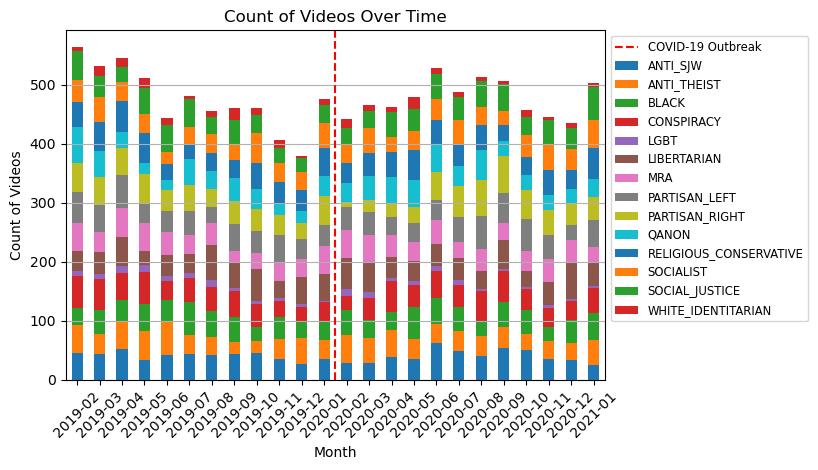

In [38]:
df_before = pd.DataFrame(before_covid_top_videos_df)
df_after = pd.DataFrame(after_covid_top_videos_df)

# Convert publish_date to datetime
df_before['publish_date'] = pd.to_datetime(df_before['publish_date'])
df_after['publish_date'] = pd.to_datetime(df_after['publish_date'])

# Combine DataFrames
df_combined = pd.concat([df_before, df_after])

# Create a new column for the month and year for grouping
df_combined['month'] = df_combined['publish_date'].dt.to_period('M')

# Count videos per group per month
video_counts = df_combined.groupby(['month', 'channel.ideology']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(30, 8)) 
video_counts.plot(kind='bar', stacked=True)

x_position = video_counts.index.get_loc(pd.Period('2020-01')) + 0.5  # Place line in between

plt.axvline(x=x_position, color='red', linestyle='--', label='COVID-19 Outbreak')

# Formatting the plot
plt.title('Count of Videos Over Time')
plt.xlabel('Month')
plt.ylabel('Count of Videos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')  # Adjusted legend position

# Show the plot
plt.show()

In [23]:
# Sum video lengths for each dataset
total_length_before = before_covid_top_videos_df['length'].sum()  # Total length before COVID
total_length_after = after_covid_top_videos_df['length'].sum()    # Total length after COVID

# Combine total lengths
total_length_combined = total_length_before + total_length_after

# Convert lengths to hours
total_length_before_hours = total_length_before / 3600
total_length_after_hours = total_length_after / 3600
total_length_combined_hours = total_length_combined / 3600

# Display results
print(f"Total video length before COVID: {total_length_before_hours:.2f} hours")
print(f"Total video length after COVID: {total_length_after_hours:.2f} hours")
print(f"Total combined video length: {total_length_combined_hours:.2f} hours")

Total video length before COVID: 920.00 hours
Total video length after COVID: 938.99 hours
Total combined video length: 1858.99 hours


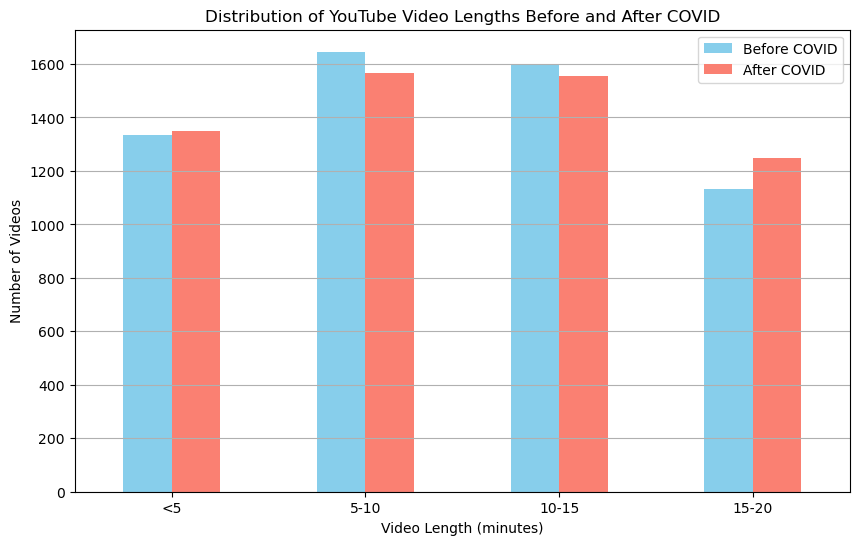

In [33]:
# Creating DataFrames
df_before = pd.DataFrame(before_covid_top_videos_df)
df_after = pd.DataFrame(after_covid_top_videos_df)

# Convert length from seconds to minutes
df_before['length'] = df_before['length'] / 60
df_after['length'] = df_after['length'] / 60

# Define the length bins (under 5, 5-10, 10-15, 15-20 minutes)
bins = [0, 5, 10, 15, 20]
labels = ['<5', '5-10', '10-15', '15-20']

# Cut the length column into bins
df_before['length_category'] = pd.cut(df_before['length'], bins=bins, labels=labels, right=False)
df_after['length_category'] = pd.cut(df_after['length'], bins=bins, labels=labels, right=False)

# Count the number of videos in each bin
before_counts = df_before['length_category'].value_counts(sort=False)
after_counts = df_after['length_category'].value_counts(sort=False)

# Create a dataframe for easier plotting
length_distribution = pd.DataFrame({
    'Before COVID': before_counts,
    'After COVID': after_counts
})

# Plot the distribution
ax = length_distribution.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Distribution of YouTube Video Lengths Before and After COVID')
plt.xlabel('Video Length (minutes)')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.grid(True, axis='y')

# Show the plot
plt.show()

In [40]:
from transformers import GPT2Tokenizer

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Creating DataFrames
df_before = pd.DataFrame(before_covid_top_videos_df)
df_after = pd.DataFrame(after_covid_top_videos_df)

# Function to count the number of tokens using the GPT tokenizer
def count_tokens(text):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    return len(tokens)

# Add a new column 'transcript_tokens' and 'summary_tokens' for both before and after data
df_before['transcript_tokens'] = df_before['transcripts'].apply(count_tokens)
df_before['summary_tokens'] = df_before['summary'].apply(count_tokens)

df_after['transcript_tokens'] = df_after['transcripts'].apply(count_tokens)
df_after['summary_tokens'] = df_after['summary'].apply(count_tokens)

# Calculate max and average tokens for transcripts and summaries
transcript_max_before = df_before['transcript_tokens'].max()
transcript_avg_before = df_before['transcript_tokens'].mean()

summary_max_before = df_before['summary_tokens'].max()
summary_avg_before = df_before['summary_tokens'].mean()

transcript_max_after = df_after['transcript_tokens'].max()
transcript_avg_after = df_after['transcript_tokens'].mean()

summary_max_after = df_after['summary_tokens'].max()
summary_avg_after = df_after['summary_tokens'].mean()

# Display the results
print("Before COVID:")
print(f"Max tokens in transcripts: {transcript_max_before}")
print(f"Average tokens in transcripts: {transcript_avg_before:.2f}")
print(f"Max tokens in summaries: {summary_max_before}")
print(f"Average tokens in summaries: {summary_avg_before:.2f}")

print("\nAfter COVID:")
print(f"Max tokens in transcripts: {transcript_max_after}")
print(f"Average tokens in transcripts: {transcript_avg_after:.2f}")
print(f"Max tokens in summaries: {summary_max_after}")
print(f"Average tokens in summaries: {summary_avg_after:.2f}")

# Combine the two DataFrames
df_combined = pd.concat([df_before, df_after])

# Calculate max, average, and sum tokens for transcripts and summaries
transcript_max = df_combined['transcript_tokens'].max()
transcript_avg = df_combined['transcript_tokens'].mean()
transcript_sum = df_combined['transcript_tokens'].sum()

summary_max = df_combined['summary_tokens'].max()
summary_avg = df_combined['summary_tokens'].mean()
summary_sum = df_combined['summary_tokens'].sum()

# Display the results
print("\nCombined Before and After COVID:")
print(f"Max tokens in transcripts: {transcript_max}")
print(f"Average tokens in transcripts: {transcript_avg:.2f}")
print(f"Total tokens in transcripts: {transcript_sum}")

print(f"Max tokens in summaries: {summary_max}")
print(f"Average tokens in summaries: {summary_avg:.2f}")
print(f"Total tokens in summaries: {summary_sum}")

/ceph/iharsawi/miniconda3/envs/thesis7/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (2107 > 1024). Running this sequence through the model will result in indexing errors


Before COVID:
Max tokens in transcripts: 5647
Average tokens in transcripts: 1846.68
Max tokens in summaries: 498
Average tokens in summaries: 243.77

After COVID:
Max tokens in transcripts: 6158
Average tokens in transcripts: 1871.91
Max tokens in summaries: 488
Average tokens in summaries: 242.67

Combined Before and After COVID:
Max tokens in transcripts: 6158
Average tokens in transcripts: 1859.31
Total tokens in transcripts: 21270471
Max tokens in summaries: 498
Average tokens in summaries: 243.22
Total tokens in summaries: 2782424
